In [ ]:
!py -m pip install keras_tuner


In [2]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import OneClassSVM
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from imblearn.under_sampling import RandomUnderSampler



In [3]:
X_train_OU = pd.read_csv('data/BitcoinX_ou_d3.csv')

y_train_OU = pd.read_csv('data/BitcoinY_ou_d3.csv')
y_train_OU = y_train_OU.label
y_test = pd.read_csv('data/BitcoinY_test_d3.csv')

X_test = pd.read_csv('data/BitcoinX_test_d3.csv')

y_test = y_test.label



y_test = pd.get_dummies(y_test).astype(float)
y_train_OU = pd.get_dummies(y_train_OU).astype(float)




# Creating Neural Networks and Testing Different parameters trying to find the best ones


## Model Test 1

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryFocalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

stopper = EarlyStopping(monitor='loss', patience = 5, restore_best_weights = True, start_from_epoch = 10) # stops running if loss stops decreasing
model1 = Sequential()
model1.add(Dense(120, activation = 'sigmoid', input_dim = X_train_OU.shape[1])),
model1.add(Dense(units = 80, activation = 'sigmoid'))
model1.add(Dense(units = 40, activation = 'tanh'))
model1.add(Dense(units = 2, activation = 'sigmoid'))
model1.compile(optimizer = SGD(learning_rate = 0.49), loss = 'categorical_crossentropy',metrics=['accuracy'])

In [5]:
history = model1.fit(X_train_OU, y_train_OU, epochs = 1000,verbose = 0,batch_size=3200, callbacks = [stopper])

yhat_test = model1.predict(X_test,verbose = 2)

18230/18230 - 7s - 389us/step


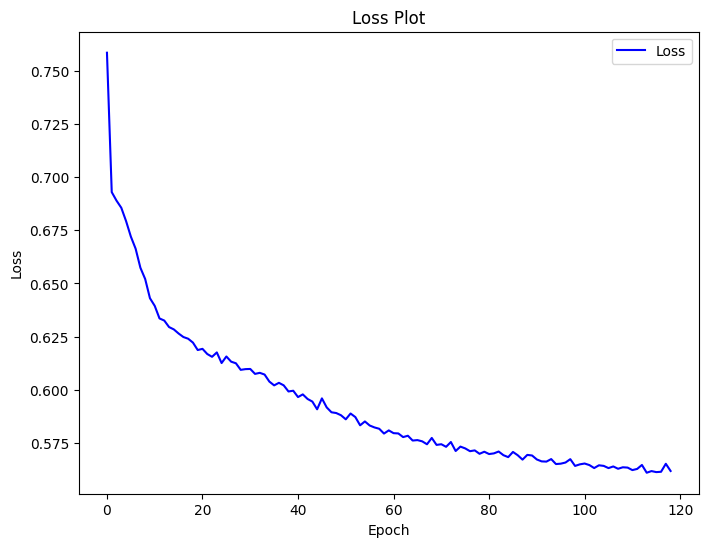

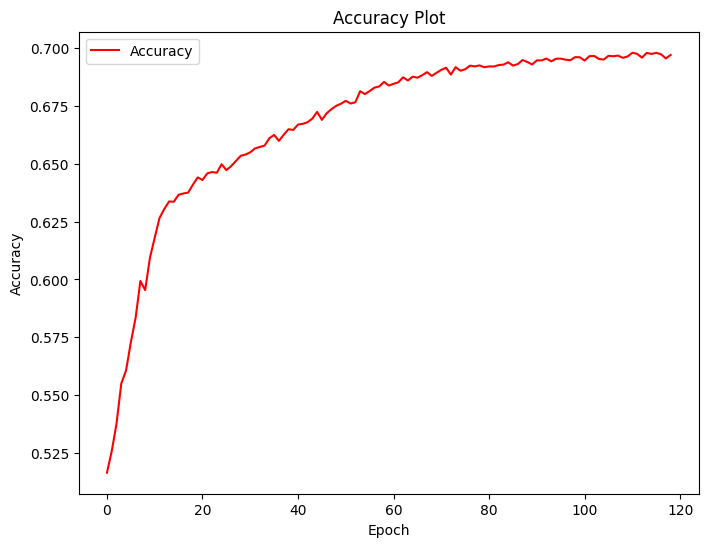

In [6]:
# Generate loss plot

loss = history.history['loss']

plt.figure(figsize=(8, 6))

plt.plot(loss, label='Loss', color='blue')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate metrics (accuracy) plot

accuracy = history.history['accuracy']

plt.figure(figsize=(8, 6))

plt.plot(accuracy, label='Accuracy', color='red')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:

y_traininghat = model1.predict(X_train_OU)
y_train_indices = np.argmax(y_train_OU,axis=1)
y_th_i = np.argmax(y_traininghat,axis = 1)


y_test_indices = np.argmax(y_test,axis =1)
yhat_test_indices = np.argmax(yhat_test,axis = 1)
print("\nAccuracy Score for Testing:", accuracy_score(y_test_indices,yhat_test_indices))

print("\nAccuracy Score for Training:", accuracy_score(y_train_indices, y_th_i))

print('\nClassification Report for Testing:\n', classification_report(y_test_indices,yhat_test_indices))

print('\nClassification Report for Training:\n', classification_report(y_train_indices,y_th_i))

8302/8302 ━━━━━━━━━━━━━━━━━━━━ 3s 406us/step

Accuracy Score for Testing: 0.8389635547022319

Accuracy Score for Training: 0.6602598849640137

Classification Report for Testing:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91    575134
           1       0.04      0.48      0.08      8206

    accuracy                           0.84    583340
   macro avg       0.52      0.66      0.49    583340
weighted avg       0.98      0.84      0.90    583340


Classification Report for Training:
               precision    recall  f1-score   support

           0       0.62      0.84      0.71    132828
           1       0.75      0.48      0.58    132828

    accuracy                           0.66    265656
   macro avg       0.69      0.66      0.65    265656
weighted avg       0.69      0.66      0.65    265656



[]

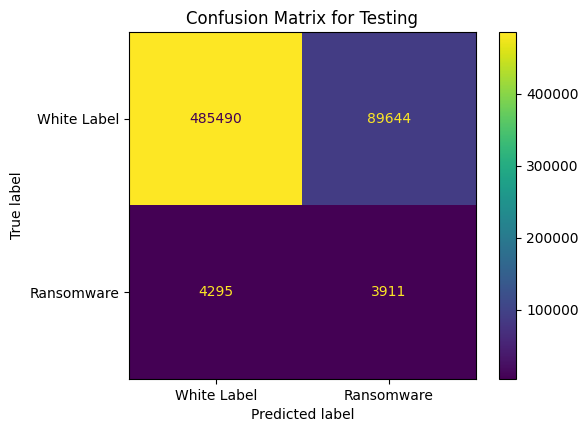

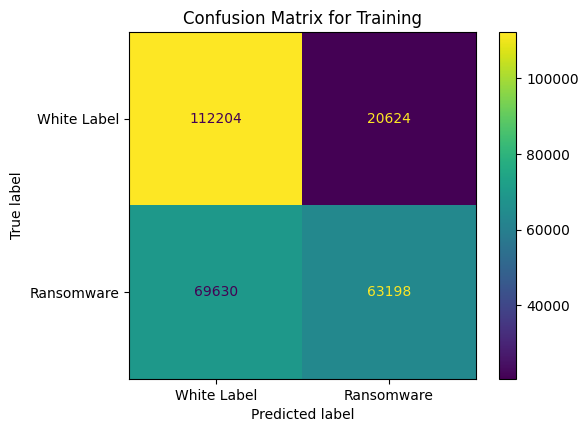

In [8]:
# Testing Confusion Matrix
test_cm = confusion_matrix(y_test_indices, yhat_test_indices, labels=[0,1])
test_dcm = ConfusionMatrixDisplay(test_cm, display_labels=['White Label', 'Ransomware'])
fig, ax = plt.subplots(figsize=(6, 4.5))
test_dcm.plot(ax=ax,values_format = 'd')
ax.set_title('Confusion Matrix for Testing')

# Training Confusion Matrix
train_cm = confusion_matrix(y_train_indices, y_th_i, labels=[0,1])
train_dcm = ConfusionMatrixDisplay(train_cm, display_labels=['White Label', 'Ransomware'])
fig, ax = plt.subplots(figsize=(6, 4.5))
train_dcm.plot(ax=ax,values_format = 'd')
ax.set_title('Confusion Matrix for Training')

plt.plot()

## Model Test 2

In [9]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryFocalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

stopper = EarlyStopping(monitor='loss', patience = 5, restore_best_weights = True, start_from_epoch = 10) # stops running if loss stops decreasing
model2 = Sequential()
model2.add(Dense(12, activation = 'sigmoid', input_dim = X_train_OU.shape[1])),
model2.add(Dense(units = 8, activation = 'sigmoid'))
model2.add(Dense(units = 4, activation = 'sigmoid'))
model2.add(Dense(units = 2, activation = 'sigmoid'))
model2.compile(optimizer = SGD(learning_rate = 0.49), loss = 'categorical_crossentropy',metrics=['accuracy'])

c:\Users\zxchx\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
history = model2.fit(X_train_OU, y_train_OU, epochs = 1000,verbose = 0,batch_size=3200, callbacks = [stopper])

yhat_test = model2.predict(X_test,verbose = 2)

18230/18230 - 7s - 380us/step


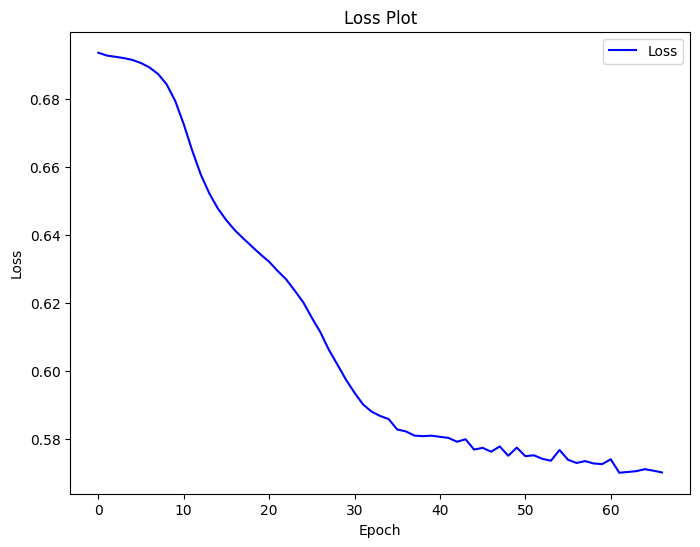

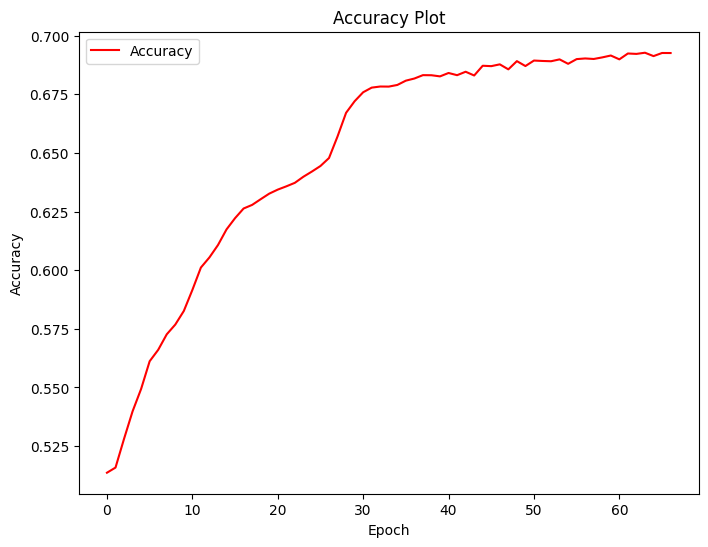

In [11]:
# Generate loss plot

loss = history.history['loss']

plt.figure(figsize=(8, 6))

plt.plot(loss, label='Loss', color='blue')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate metrics (accuracy) plot

accuracy = history.history['accuracy']

plt.figure(figsize=(8, 6))

plt.plot(accuracy, label='Accuracy', color='red')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:

y_traininghat = model2.predict(X_train_OU)
y_train_indices = np.argmax(y_train_OU,axis=1)
y_th_i = np.argmax(y_traininghat,axis = 1)


y_test_indices = np.argmax(y_test,axis =1)
yhat_test_indices = np.argmax(yhat_test,axis = 1)
print("\nAccuracy Score for Testing:", accuracy_score(y_test_indices,yhat_test_indices))

print("\nAccuracy Score for Training:", accuracy_score(y_train_indices, y_th_i))

print('\nClassification Report for Testing:\n', classification_report(y_test_indices,yhat_test_indices))

print('\nClassification Report for Training:\n', classification_report(y_train_indices,y_th_i))

8302/8302 ━━━━━━━━━━━━━━━━━━━━ 3s 390us/step

Accuracy Score for Testing: 0.6424040868104365

Accuracy Score for Training: 0.6902385039298943

Classification Report for Testing:
               precision    recall  f1-score   support

           0       0.99      0.64      0.78    575134
           1       0.03      0.74      0.05      8206

    accuracy                           0.64    583340
   macro avg       0.51      0.69      0.42    583340
weighted avg       0.98      0.64      0.77    583340


Classification Report for Training:
               precision    recall  f1-score   support

           0       0.71      0.64      0.67    132828
           1       0.67      0.74      0.70    132828

    accuracy                           0.69    265656
   macro avg       0.69      0.69      0.69    265656
weighted avg       0.69      0.69      0.69    265656



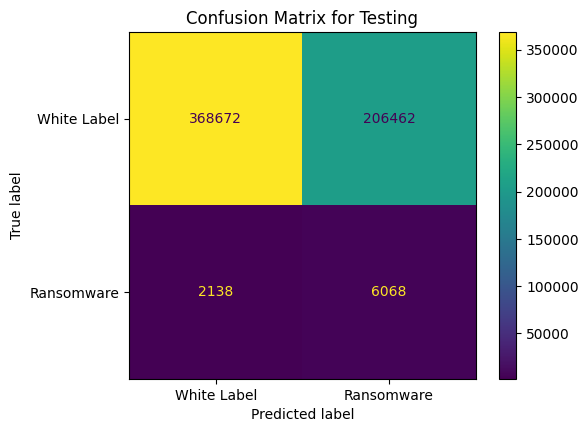

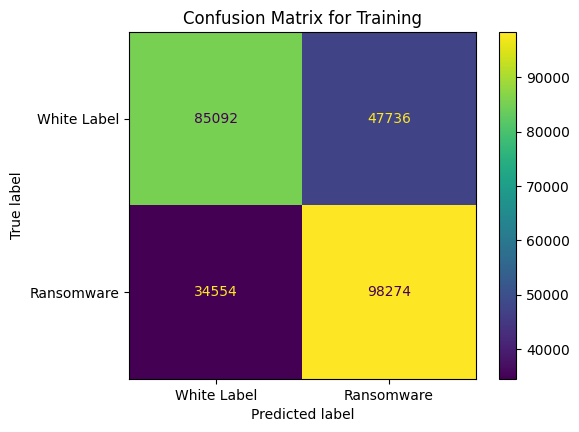

In [13]:
# Testing Confusion Matrix
test_cm = confusion_matrix(y_test_indices, yhat_test_indices, labels=[0,1])
test_dcm = ConfusionMatrixDisplay(test_cm, display_labels=['White Label', 'Ransomware'])
fig, ax = plt.subplots(figsize=(6, 4.5))
test_dcm.plot(ax=ax, values_format = 'd')
ax.set_title('Confusion Matrix for Testing')

# Training Confusion Matrix
train_cm = confusion_matrix(y_train_indices, y_th_i, labels=[0,1])
train_dcm = ConfusionMatrixDisplay(train_cm, display_labels=['White Label', 'Ransomware'])
fig, ax = plt.subplots(figsize=(6, 4.5))
train_dcm.plot(ax=ax, values_format = 'd')
ax.set_title('Confusion Matrix for Training')

plt.show()

## Model Test 3

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryFocalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

stopper = EarlyStopping(monitor='loss', patience = 5, restore_best_weights = True, start_from_epoch = 10) # stops running if loss stops decreasing
model3 = Sequential()
model3.add(Dense(1024, activation = 'tanh', input_dim = X_train_OU.shape[1])),
model3.add(Dense(units = 512, activation = 'relu'))
model3.add(Dense(units = 324, activation = 'tanh'))
model3.add(Dense(units = 216, activation = 'relu'))
model3.add(Dense(units = 128, activation = 'tanh'))
model3.add(Dense(units = 64, activation = 'relu'))
model3.add(Dense(units = 32, activation = 'tanh'))
model3.add(Dense(units = 16, activation = 'relu'))
model3.add(Dense(units = 8, activation = 'tanh'))
model3.add(Dense(units = 4, activation = 'relu'))
model3.add(Dense(units = 2, activation = 'sigmoid'))
model3.compile(optimizer = SGD(learning_rate = 0.49), loss = 'categorical_crossentropy',metrics=['accuracy'])

In [22]:
history = model3.fit(X_train_OU, y_train_OU, epochs = 1000,verbose = 0,batch_size=320, callbacks = [stopper])

yhat_test = model3.predict(X_test,verbose = 2)

18230/18230 - 21s - 1ms/step


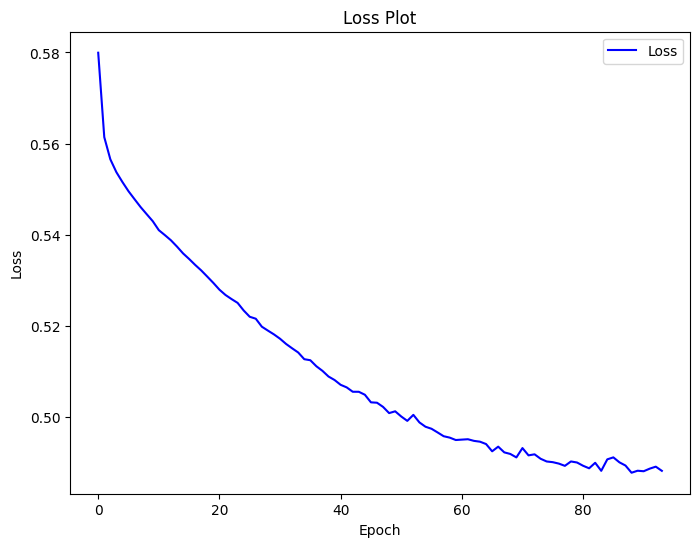

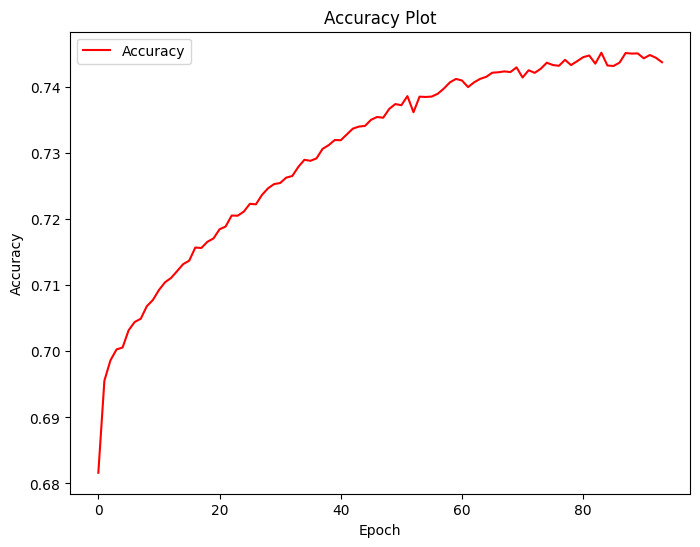

In [23]:
# Generate loss plot

loss = history.history['loss']

plt.figure(figsize=(8, 6))

plt.plot(loss, label='Loss', color='blue')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate metrics (accuracy) plot

accuracy = history.history['accuracy']

plt.figure(figsize=(8, 6))

plt.plot(accuracy, label='Accuracy', color='red')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:

y_traininghat = model3.predict(X_train_OU)
y_train_indices = np.argmax(y_train_OU,axis=1)
y_th_i = np.argmax(y_traininghat,axis = 1)


y_test_indices = np.argmax(y_test,axis =1)
yhat_test_indices = np.argmax(yhat_test,axis = 1)
print("\nAccuracy Score for Testing:", accuracy_score(y_test_indices,yhat_test_indices))

print("\nAccuracy Score for Training:", accuracy_score(y_train_indices, y_th_i))

print('\nClassification Report for Testing:\n', classification_report(y_test_indices,yhat_test_indices))

print('\nClassification Report for Training:\n', classification_report(y_train_indices,y_th_i))

8302/8302 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step

Accuracy Score for Testing: 0.7502228545959475

Accuracy Score for Training: 0.7429420001806848

Classification Report for Testing:
               precision    recall  f1-score   support

           0       0.99      0.75      0.86    575134
           1       0.04      0.65      0.07      8206

    accuracy                           0.75    583340
   macro avg       0.51      0.70      0.46    583340
weighted avg       0.98      0.75      0.84    583340


Classification Report for Training:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75    132828
           1       0.75      0.72      0.74    132828

    accuracy                           0.74    265656
   macro avg       0.74      0.74      0.74    265656
weighted avg       0.74      0.74      0.74    265656



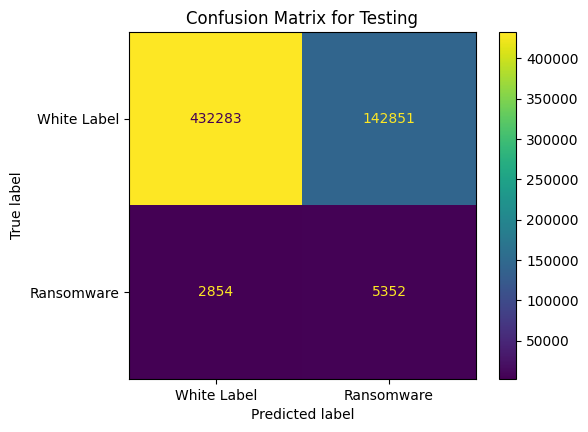

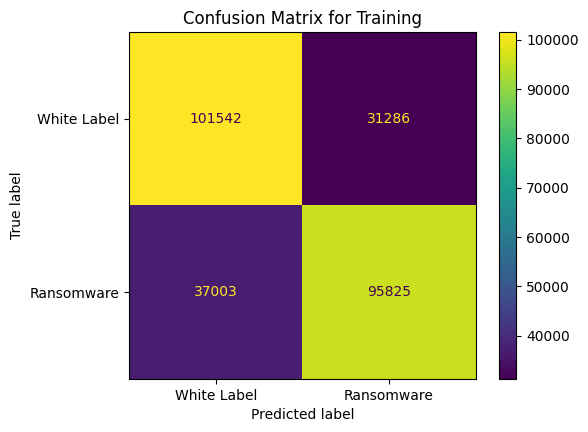

In [25]:
# Testing Confusion Matrix
test_cm = confusion_matrix(y_test_indices, yhat_test_indices, labels=[0,1])
test_dcm = ConfusionMatrixDisplay(test_cm, display_labels=['White Label', 'Ransomware'])
fig, ax = plt.subplots(figsize=(6, 4.5))
test_dcm.plot(ax=ax , values_format = 'd')
ax.set_title('Confusion Matrix for Testing')

# Training Confusion Matrix
train_cm = confusion_matrix(y_train_indices, y_th_i, labels=[0,1])
train_dcm = ConfusionMatrixDisplay(train_cm, display_labels=['White Label', 'Ransomware'])
fig, ax = plt.subplots(figsize=(6, 4.5))
train_dcm.plot(ax=ax, values_format = 'd')
ax.set_title('Confusion Matrix for Training')

plt.show()

# Best Model Hyper Parameters Found - 

In [27]:
model3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 1024)           │        44,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 324)            │       166,212 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 216)            │        70,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        27,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 844,068 (3.22 MB)

 Trainable params: 844,066 (3.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)